### Implement a simple DNN for solving the polynomial y = 5x^3 - 7x + 1 with the following conditions:

- Use three hidden layers of size 32, 64, 128 and display the generated DNN with the parameter numbers.

- Generate training samples within the range -15 to +15. Use appropriate method for nomalizing training data in the range of -1 to +1.

- Use 5% of the samples as test data and 5% of the samples as validation data and rest of the data for training the DNN with appropriate number of epochs.

- Display the training accuracy vs validation accuracy and training error vs validation error curves.

- After training, use the test data for prediction and display the prediction accuracy vs true levels of the test data.



**Assignment**: `training samples, normalization, training data, normalizing training data, test data, validation data, epochs, training accuracry, validation accuracy, training error, validation error, prediction accuracy, true levels of the test data(true accuracy), mnist dataset.`

## **Required libraries**

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation
from sklearn.model_selection import train_test_split

## **Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters.**

In [57]:
def DNN():

    input = Input((1,), name='Input_Layer')

    x1 = Dense(32, activation='relu')(input)

    x2 = Dense(64, activation='relu')(x1)

    x3 = Dense(128, activation='relu')(x2)

    output = Dense(1, name='Output_Layer')(x3)

    model = Model(input, output, name="DNN_Model_For_Polynomial")

    model.summary()

    return model

## **Generate training samples within the range of -15 to +15. Use an appropriate method for normalizing the training data in the range of -1 to +1.**

In [58]:
#  training samples within the range of -15 to +15
samples = 5000
x = np.random.uniform(-15, 15, samples)
y = 5 * (x ** 3) - 7 * x + 1

# normalizing the training data in the range of -1 to +1.
x_normalization = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y_normalization = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

## **Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with an appropriate number of epochs.**

In [59]:
# 5% data for testing
x_test = x_normalization[int(samples * 0.95) : ]
y_test = y_normalization[int(samples * 0.95) : ]

# 5% data for validation
x_valid = x_normalization[int(samples * 0.90) : int(samples * 0.95)]
y_valid = y_normalization[int(samples * 0.90) : int(samples * 0.95)]

# 90% data for traing purpose
x_train = x_normalization[:int(samples * 0.9)]
y_train = y_normalization[:int(samples * 0.9)]


model = DNN()


# trining the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error', metrics=[metrics.R2Score(name='accuracy')])
trained_model = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs = 10)

Model: "DNN_Model_For_Polynomial"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7113 - loss: 0.0417 - val_accuracy: 0.9926 - val_loss: 0.0012
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9955 - loss: 6.1612e-04 - val_accuracy: 0.9981 - val_loss: 2.9478e-04
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 1.3773e-04 - val_accuracy: 0.9996 - val_loss: 6.5652e-05
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 5.4142e-05 - val_accuracy: 0.9997 - val_loss: 4.6437e-05
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 3.2210e-05 - val_accuracy: 0.9998 - val_loss: 2.8135e-05
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 1.8723e-05 - val_accuracy: 0.9998 - val_loss: 2.9084e-05
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 1.8427e-05 - val_accuracy: 0.9999 - val_loss: 9.9891e-06
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

## **Display the training accuracy vs validation accuracy**

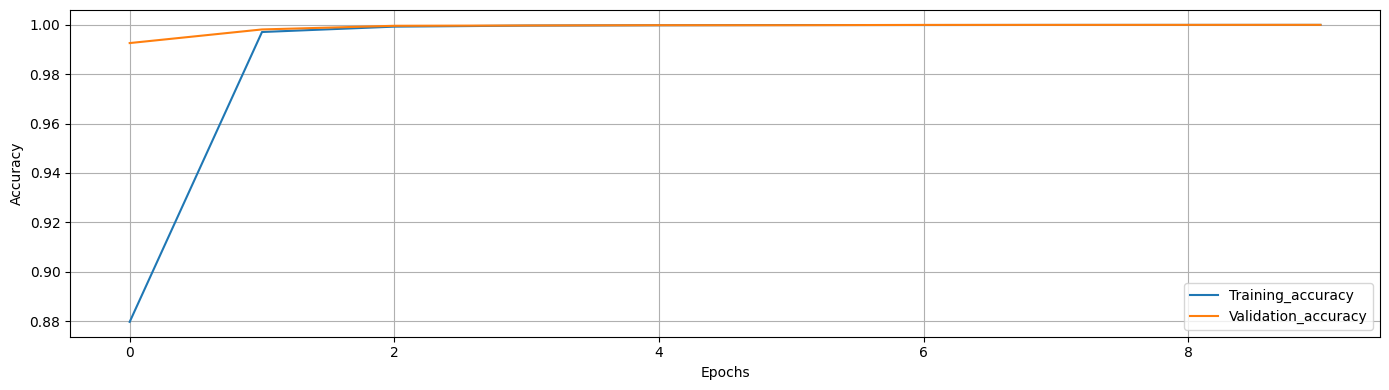

In [60]:
# for model history
training_history = trained_model.history

# For ploting training and Validation Accuracy
plt.figure(figsize=(14,4))

plt.plot(training_history['accuracy'])
plt.plot(training_history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(["Training_accuracy", "Validation_accuracy"])
plt.tight_layout()
plt.grid()

## **Display the training training error vs validation error curves.**

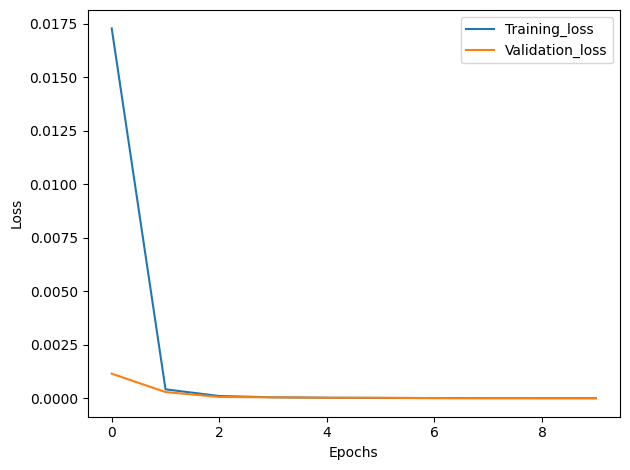

In [61]:
# For ploting training and Validation Loss

plt.plot(training_history['loss'])
plt.plot(training_history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Training_loss", "Validation_loss"])
plt.grid()
plt.tight_layout()
plt.grid()

## **Prediction accuracy vs True Levels**

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.0549e-06 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


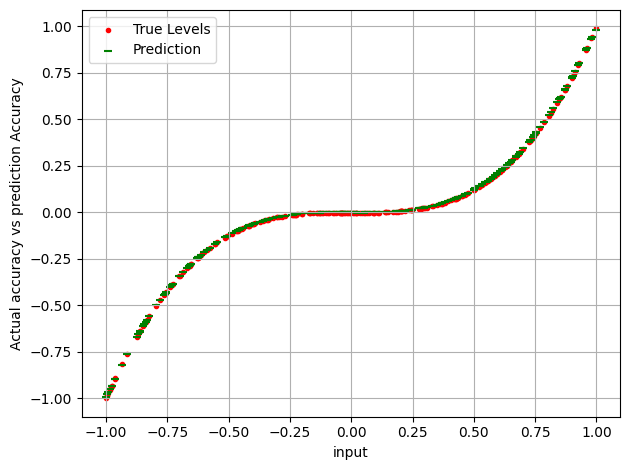

In [62]:
model.evaluate(x_test, y_test)
y_predict = model.predict(x_test)

plt.scatter(x_test, y_test, marker='.', color='red')
plt.scatter(x_test, y_predict, marker='_', color = 'green')
plt.legend(["True Levels", "Prediction"])
plt.xlabel('input')
plt.ylabel('Actual accuracy vs prediction Accuracy')
plt.tight_layout()
plt.grid()